In [3]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [4]:
#reading the data 
df=pd.read_csv('hyundi.csv')

In [67]:
df.head(3)

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7


In [68]:
# Loop through each column in the DataFrame and print its unique values.
for i in df.columns:
    print(i,df[i].unique(),'\n',sep='\n')
    

model
[' I20' ' Tucson' ' I10' ' IX35' ' I30' ' I40' ' Ioniq' ' Kona'
 ' Veloster' ' I800' ' IX20' ' Santa Fe' ' Accent' ' Terracan' ' Getz'
 ' Amica']


year
[2017 2016 2015 2018 2019 2013 2014 2011 2012 2020 2010 2008 2009 2000
 2005 2007 2003 2002 2006]


price
[ 7999 14499 11399 ...  8680  6830 13994]


transmission
['Manual' 'Automatic' 'Semi-Auto' 'Other']


mileage
[17307 25233 37877 ... 13810 23313 11472]


fuelType
['Petrol' 'Diesel' 'Hybrid' 'Other']


tax(£)
[145 235  30  20 160 125 150 135 200   0 165 265 300 205 140 325 260 240
 330 305 120 190 555 115]


mpg
[ 58.9  43.5  61.7  60.1  51.4  55.4  57.6  56.5  34.9  65.7  44.8  53.3
  78.4  78.5  46.3  45.6  72.4  44.1  52.3  35.3  41.5  61.4  31.7  38.7
  48.7  33.6  64.2  57.7  50.4  47.9  62.8  39.2  47.1  42.8  74.3  28.
  67.3  34.   36.2  42.2   1.1  54.3  46.   39.8  43.6  76.3  68.9  49.6
  35.8  37.7 256.8  37.2  40.9  40.4  70.6  34.5  38.2  32.8  30.4  28.8]


engineSize
[1.2 2.  1.7 1.  1.4 1.6 0.  2.5 2.2 1.3 2.

In [69]:
#checking null values in data
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
dtype: int64

In [6]:
#dividing values into categorical and numerical
column_types = df.dtypes
numerical_columns = []
categorical_columns = []
for column_name, column_type in column_types.items():
    if column_type in [int, float]:
        numerical_columns.append(column_name)
    else:
        categorical_columns.append(column_name)
print("Numerical columns:")
print(numerical_columns)
print("\nCategorical columns:")
print(categorical_columns)

Numerical columns:
['mpg', 'engineSize']

Categorical columns:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax(£)']


In [7]:
df

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


In [71]:
#checking datatypes of all columns
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax(£)            int64
mpg             float64
engineSize      float64
dtype: object

Statistics:
              year        price        mileage       tax(£)          mpg  \
count  4860.000000   4860.00000    4860.000000  4860.000000  4860.000000   
mean   2017.107613  12750.13107   21486.049588   121.147119    53.827798   
std       1.920456   5992.92231   17710.196964    58.003289    12.736042   
min    2000.000000   1200.00000       1.000000     0.000000     1.100000   
25%    2016.000000   8000.00000    8339.250000   125.000000    44.800000   
50%    2017.000000  11990.00000   17462.000000   145.000000    55.400000   
75%    2019.000000  15733.75000   30967.000000   145.000000    60.100000   
max    2020.000000  92000.00000  138000.000000   555.000000   256.800000   

        engineSize  
count  4860.000000  
mean      1.457922  
std       0.400788  
min       0.000000  
25%       1.200000  
50%       1.600000  
75%       1.700000  
max       2.900000  


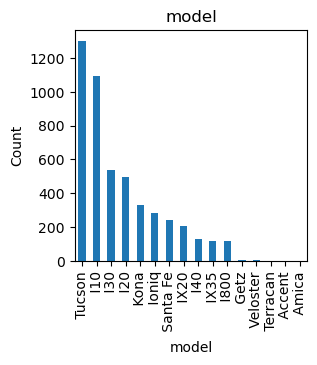

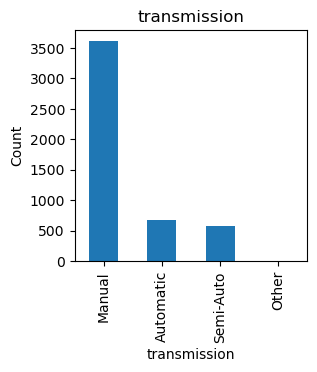

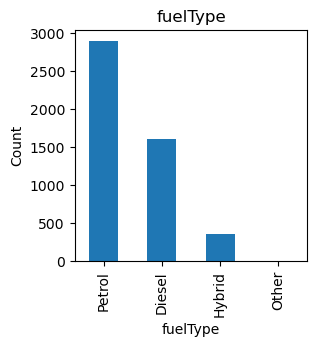

In [72]:
# Analyze and visualize statistical summary and categorical value counts for specified columns in the DataFrame.
numerical_columns = ['year', 'price', 'mileage', 'tax(£)', 'mpg', 'engineSize']
# Calculate and print descriptive statistics for numerical columns.
numerical_stats = df[numerical_columns].describe()
print("Statistics:")
print(numerical_stats)
# Specify categorical columns for visualization.
categorical_columns = ['model', 'transmission', 'fuelType']
# Create bar plots for value counts of each categorical column.
for column in categorical_columns:
    plt.figure(figsize=(3, 3))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

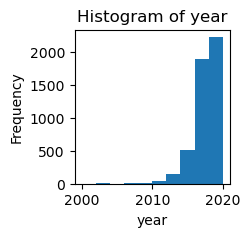

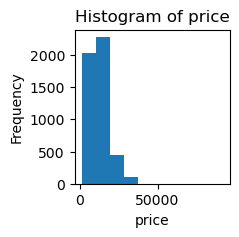

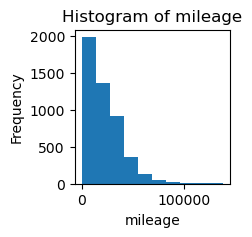

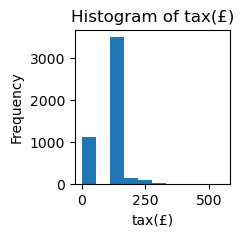

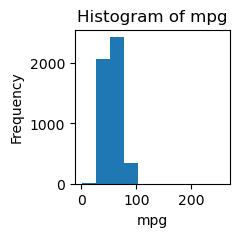

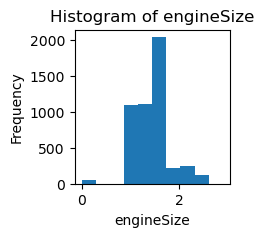

In [73]:
# Create and display histograms for specified numerical columns in the DataFrame.
for column in numerical_columns:
    plt.figure(figsize=(2, 2))
    plt.hist(df[column], bins=10)
    plt.title(f'Histogram of {column}')
    # Set plot title, x-axis label, and y-axis label.
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

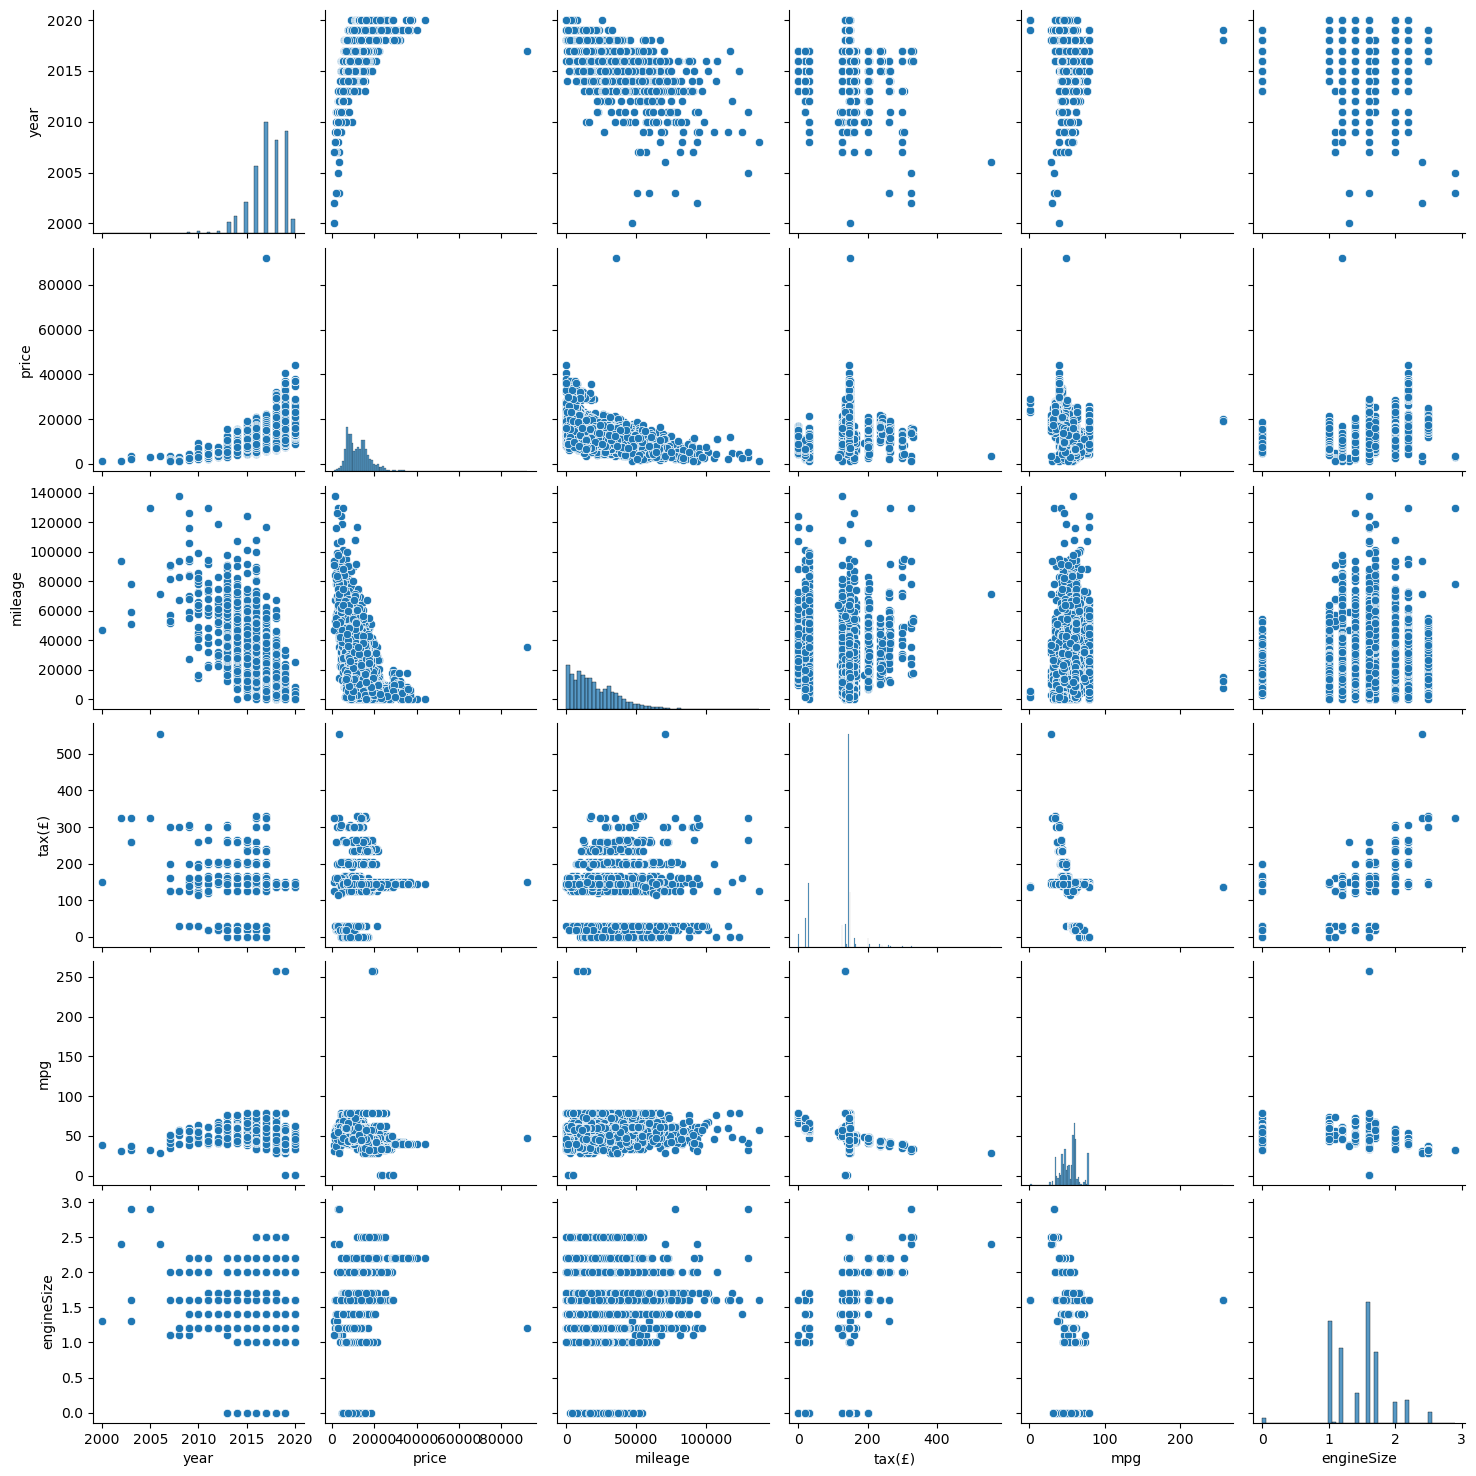

In [74]:
import pandas as pd
import seaborn as sns
# Define numerical columns of interest.
numerical_columns = ['year', 'price', 'mileage', 'tax(£)', 'mpg', 'engineSize']
# Use Seaborn's pairplot to create scatter plots and histograms for pairs of numerical columns.
sns.pairplot(df[numerical_columns])
plt.show()

In [75]:
import pandas as pd
from scipy.stats import chi2_contingency
# Calculate and analyze the chi-square test between 'transmission' and 'fuelType' columns.

cross_table1 = pd.crosstab(df['transmission'], df['fuelType'])
chi2_stat1, p_val1, dof1, expected1 = chi2_contingency(cross_table1)
print(f"Chi-square test for transmission and fuelType:\nChi2 Stat: {chi2_stat1}\nP-value: {p_val1}\nDegrees of Freedom: {dof1}")
# Calculate and analyze the chi-square test between 'fuelType' and 'model' columns.
cross_table2 = pd.crosstab(df['fuelType'], df['model'])
chi2_stat2, p_val2, dof2, expected2 = chi2_contingency(cross_table2)
print(f"\nChi-square test for fuelType and model:\nChi2 Stat: {chi2_stat2}\nP-value: {p_val2}\nDegrees of Freedom: {dof2}")


Chi-square test for transmission and fuelType:
Chi2 Stat: 1759.907449624137
P-value: 0.0
Degrees of Freedom: 9

Chi-square test for fuelType and model:
Chi2 Stat: 6468.947956320616
P-value: 0.0
Degrees of Freedom: 45


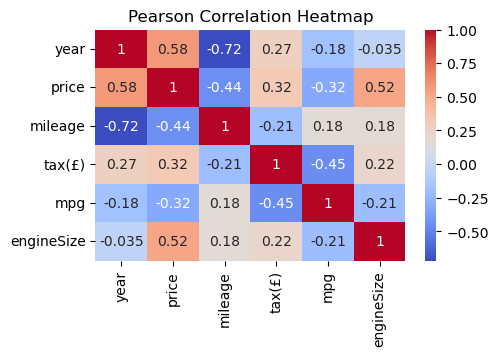

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Define numerical columns of interest.
numerical_columns = ['year', 'price', 'mileage', 'tax(£)', 'mpg', 'engineSize']
# Calculate the correlation matrix between numerical columns.
corr_matrix = df[numerical_columns].corr()
# Create a heatmap to visualize the correlation matrix using Seaborn.
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# Set heatmap title and display the plot.
plt.title('Pearson Correlation Heatmap')
plt.show()

In [77]:
df

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


In [78]:
import pandas as pd
# Define categorical columns for one-hot encoding
categorical_columns = ['transmission', 'fuelType']
# Create one-hot encoded DataFrame by transforming categorical columns.
df_encoded = pd.get_dummies(df, columns=categorical_columns)
# Print the resulting one-hot encoded DataFrame.
print(df_encoded)

        model  year  price  mileage  tax(£)   mpg  engineSize  \
0         I20  2017   7999    17307     145  58.9         1.2   
1      Tucson  2016  14499    25233     235  43.5         2.0   
2      Tucson  2016  11399    37877      30  61.7         1.7   
3         I10  2016   6499    23789      20  60.1         1.0   
4        IX35  2015  10199    33177     160  51.4         2.0   
...       ...   ...    ...      ...     ...   ...         ...   
4855      I30  2016   8680    25906       0  78.4         1.6   
4856      I40  2015   7830    59508      30  65.7         1.7   
4857      I10  2017   6830    13810      20  60.1         1.0   
4858   Tucson  2018  13994    23313     145  44.8         1.6   
4859   Tucson  2016  15999    11472     125  57.6         1.7   

      transmission_Automatic  transmission_Manual  transmission_Other  \
0                          0                    1                   0   
1                          1                    0                   0   


In [79]:
#    'Manual': 1
#    'Automatic': 2
#    'Other': 3 
#    'Semi-Auto': 4

In [86]:
# Define a mapping to convert transmission values to numerical values.
transmission_up = {'Manual': 1, 'Automatic': 2, 'Other': 3 , 'Semi-Auto': 4}
# Replace transmission values in the DataFrame with their corresponding numerical values.
df['transmission'] = df['transmission'].replace(transmission_up)

In [87]:
#   'Petrol':1 
#   'Diesel':2 
#   'Hybrid':3  
#   'Other':4

In [85]:
# Define a mapping to convert fuelType values to numerical values.
fuel_up={'Petrol':1 , 'Diesel':2 , 'Hybrid':3 , 'Other':4}
# Replace fuelType values in the DataFrame with their corresponding numerical values.
df['fuelType']=df['fuelType'].replace(fuel_up)

In [81]:
import pandas as pd
# Split the DataFrame into features (X) and target (y) variables.
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1) 
y = df['price']

# Split the data into training and testing sets using a 80-20 split and a fixed random state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Drop the 'model' column from the DataFrame.
df = df.drop('model', axis=1)

# Perform one-hot encoding on the DataFrame.
df_encoded = pd.get_dummies(df)

# Separate the features (X) and target (y) variables.
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Initialize a StandardScaler for feature scaling.
scaler = StandardScaler()

# Fit the scaler and transform the features to a standardized scale.
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features and the original column names.
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Print the resulting DataFrame with scaled features.
print(df_scaled)


          year  transmission   mileage    tax(£)       mpg  engineSize  \
0    -0.056041     -0.504331 -0.235993  0.411276  0.398297   -0.643603   
1    -0.576804      0.513969  0.211592  1.963071 -0.810995    1.352671   
2    -0.576804     -0.504331  0.925604 -1.571575  0.618168    0.604068   
3    -0.576804     -0.504331  0.130049 -1.743996  0.492527   -1.142672   
4    -1.097568     -0.504331  0.660193  0.669908 -0.190644    1.352671   
...        ...           ...       ...       ...       ...         ...   
4855 -0.576804     -0.504331  0.249597 -2.088840  1.929542    0.354534   
4856 -1.097568     -0.504331  2.147117 -1.571575  0.932269    0.604068   
4857 -0.056041     -0.504331 -0.433470 -1.743996  0.492527   -1.142672   
4858  0.464722     -0.504331  0.103169  0.411276 -0.708912    0.354534   
4859 -0.576804      0.513969 -0.565498  0.066432  0.296214    0.604068   

      fuelType_Diesel  fuelType_Hybrid  fuelType_Other  fuelType_Petrol  
0           -0.703182        -0.27814

In [90]:
# Splitting data into features (X) and target (y) variables.
X = df.drop('price', axis=1)
y = df['price']

# Splitting data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting regression models.
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

svr = SVR()
svr.fit(X_train, y_train)

# Making predictions using the trained models.
linear_regression_preds = linear_regression.predict(X_test)
decision_tree_preds = decision_tree.predict(X_test)
random_forest_preds = random_forest.predict(X_test)
svr_preds = svr.predict(X_test)

# Calculating RMSE for each model's predictions.
linear_regression_rmse = mean_squared_error(y_test, linear_regression_preds, squared=False)
decision_tree_rmse = mean_squared_error(y_test, decision_tree_preds, squared=False)
random_forest_rmse = mean_squared_error(y_test, random_forest_preds, squared=False)
svr_rmse = mean_squared_error(y_test, svr_preds, squared=False)

# Printing RMSE scores for each model.
print("Linear Regression RMSE:", linear_regression_rmse)
print("Decision Tree RMSE:", decision_tree_rmse)
print("Random Forest RMSE:", random_forest_rmse)
print("SVR RMSE:", svr_rmse)


Linear Regression RMSE: 3766.5089133617794
Decision Tree RMSE: 3169.199682749182
Random Forest RMSE: 3028.25197070054
SVR RMSE: 6163.50303579129


In [92]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for predictions made by each regression model.
linear_regression_rmse = mean_squared_error(y_test, linear_regression_preds, squared=False)
decision_tree_rmse = mean_squared_error(y_test, decision_tree_preds, squared=False)
random_forest_rmse = mean_squared_error(y_test, random_forest_preds, squared=False)
svr_rmse = mean_squared_error(y_test, svr_preds, squared=False)

# Print RMSE scores for each model.
print("Linear Regression RMSE:", linear_regression_rmse)
print("Decision Tree RMSE:", decision_tree_rmse)
print("Random Forest RMSE:", random_forest_rmse)
print("SVR RMSE:", svr_rmse)


Linear Regression RMSE: 3766.5089133617794
Decision Tree RMSE: 3169.199682749182
Random Forest RMSE: 3028.25197070054
SVR RMSE: 6163.50303579129
